In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.datasets import load_sample_images

In [6]:
dataset = np.array(load_sample_images().images, dtype = np.float32)
batch_size, height, width, channels = dataset.shape
dataset.shape

(2, 427, 640, 3)

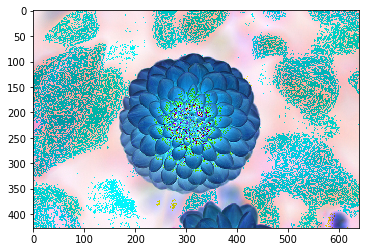

In [11]:
plt.imshow(dataset[0])

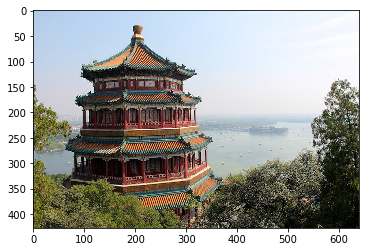

In [10]:
plt.imshow(dataset[1].astype(np.uint8))

In [13]:
filters_test = np.zeros(shape = (7,7,channels,2), dtype = np.float32)
filters_test[:,3 :,0]=1
filters_test[3,:,:,1]=1

In [15]:
filters_test[:,:,1,1] #show me all the rows for the first column for the first channel first filter

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [16]:
filters_test[:,:,0,0]

array([[ 0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  1.]], dtype=float32)

In [17]:
X = tf.placeholder(tf.float32, shape=(None, height,width,channels))
convolution = tf.nn.conv2d(X, filter = filters_test, strides=[1,2,2,1],padding='SAME')

In [18]:
sess = tf.Session()
output = sess.run(convolution, feed_dict = {X:dataset})
sess.close()

In [19]:
output.shape

(2, 214, 320, 2)

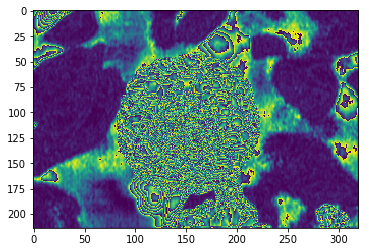

In [26]:
plt.imshow(output[0,:,:,0].astype(np.uint8))